In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

In [6]:
day_minus_2 = pd.read_csv("./p3_data/round1/prices_round_1_day_-2.csv", delimiter=";")
day_minus_1 = pd.read_csv("./p3_data/round1/prices_round_1_day_-1.csv", delimiter=";")
day_minus_0 = pd.read_csv("./p3_data/round1/prices_round_1_day_0.csv", delimiter=";")

day_minus_2 = day_minus_2[day_minus_2["product"] == "SQUID_INK"]
day_minus_1 = day_minus_1[day_minus_1["product"] == "SQUID_INK"]
day_minus_0 = day_minus_0[day_minus_0["product"] == "SQUID_INK"]

day_minus_1["timestamp"] += 1_000_000
day_minus_0["timestamp"] += 2_000_000

squid_ink = pd.concat([day_minus_2, day_minus_1, day_minus_0], ignore_index=True)
squid_ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
1,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
3,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
4,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,2999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
29996,0,2999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
29997,0,2999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
29998,0,2999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


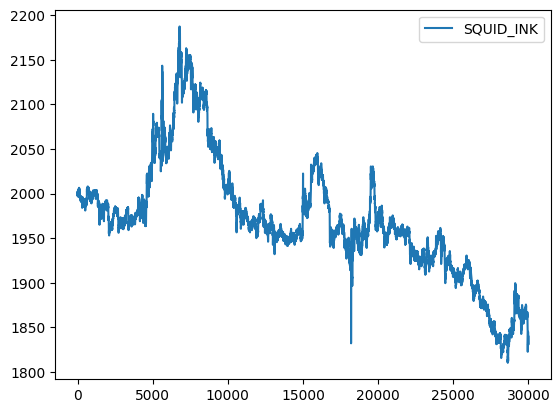

In [7]:
plt.plot(squid_ink["mid_price"], label = "SQUID_INK")
plt.legend()

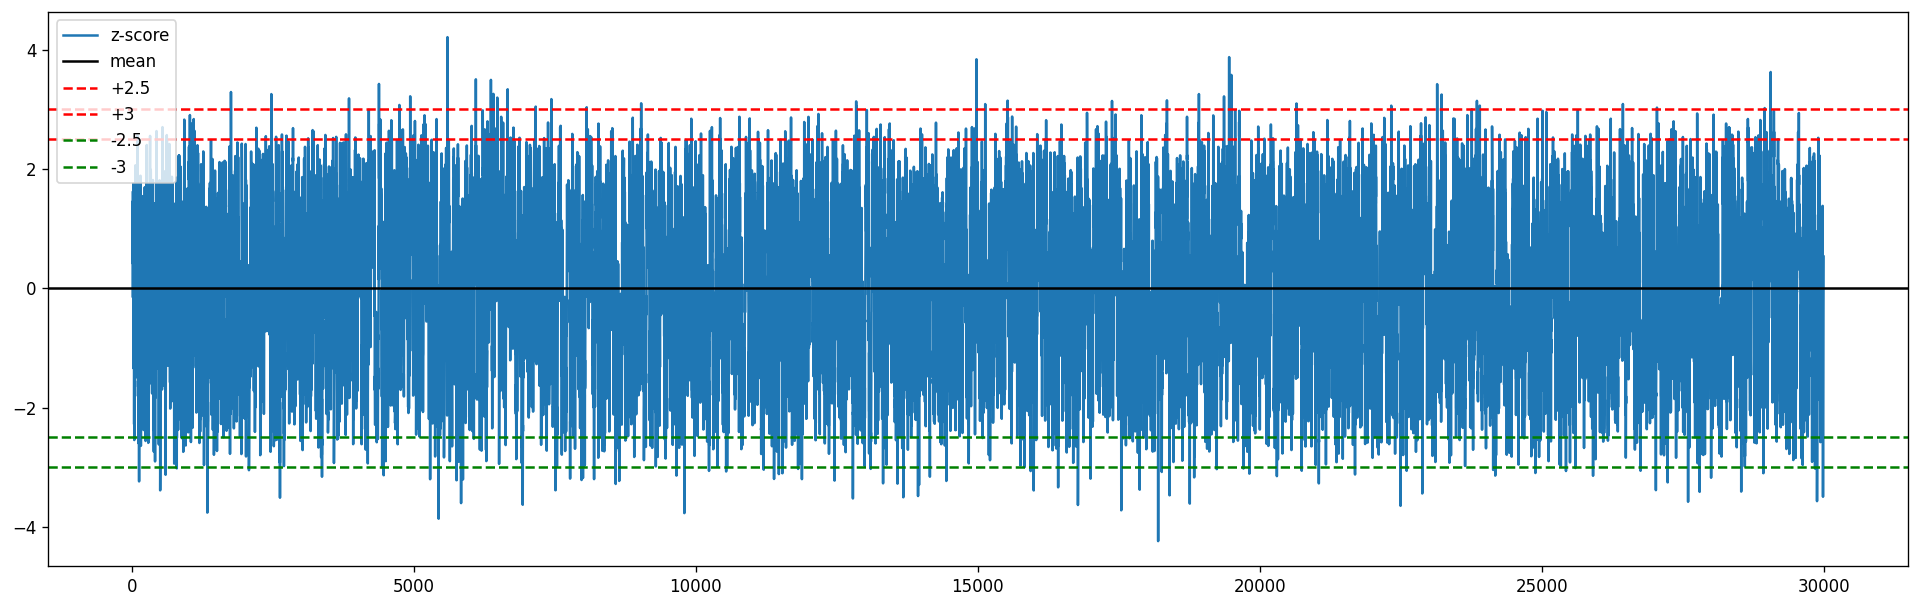

In [8]:
mean = squid_ink["mid_price"].rolling(window=20, center=False).mean()
std = squid_ink["mid_price"].rolling(window=20, center=False).std()

zscore = (squid_ink["mid_price"] - mean) / std

figure(figsize=(20, 6), dpi=120)
plt.plot(zscore)
plt.axhline(0, color='black')
plt.axhline(2.5, color='red', linestyle='--')
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-2.5, color='green', linestyle='--')
plt.axhline(-3, color='green', linestyle='--')
plt.legend(['z-score', 'mean', '+2.5','+3','-2.5','-3'])